<div class="alert alert-info alert-warning" style="background-color: white; color: black; text-align: center;">
    <h1><span style="color: blue;">Ozan MÖHÜRCÜ</span></h1>
    <h1><span style="color: blue;">Data Analyst | Data Scientist</span></h1>

👋 Hello! I am Ozan, a data analyst who is open to learning and who improves myself in analytical thinking and producing data-driven solutions. I have successfully completed my analyst training and am currently focusing on data science and increasing my competencies in this field.

📊 What Do I Know?

I can extract meaningful results from data by working with Python, SQL and data visualization tools.
I am constantly improving myself in statistical analysis and reporting.
I aim to solve problems and support decision processes with the insights I obtain.

📚 What Am I Doing Right Now?
In my data science training, I am gaining knowledge on topics such as machine learning and big data analytics. In addition, I am looking for opportunities to put my theoretical knowledge into practice by gaining experience in real-world projects.

🎯 My Goal:
To contribute to the growth goals of companies by using my talents in data analysis and data science in a way that will create value in the business world. I am here to learn new information and to constantly improve by sharing my experiences.

If you would like to discuss projects, collaborate or share experiences, I would be happy to connect!
</p>
</div>

<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
</div>

<p style="font-family: 'Amiri'; font-size: 3rem; color: blue; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #FFFFFF; padding: 5px; border-radius: 15px; border: 7px solid blue; width: 95%; line-height: 1;">˚About The Dataset˚</p>

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
    <p>
        
 **120 Years of Olympic History: Athletes and Results**
- This dataset provides comprehensive historical data on Olympic Games from the past 120 years, covering athletes, their countries, events, and results. It includes detailed records of Olympic athletes, their medals, and the events they participated in, offering a thorough look at the evolution of the Games over time.

 **Olympic Games 2021 Medals**
- This dataset focuses specifically on the 2021 Tokyo Olympic Games, containing detailed information on medalists from all countries. It includes the number of gold, silver, and bronze medals won by each country, along with event categories, athlete names, and their performances.

 **Population by Country 2020**
- This dataset provides the population figures for every country in 2020. It includes the most up-to-date demographic data, giving a snapshot of the global population distribution, and is useful for analyzing trends in population growth, density, and country-specific statistics.

 **2021 Olympics in Tokyo**
- This dataset focuses on the specific events, athletes, and countries that participated in the 2021 Tokyo Olympics. It includes information about the different sports, medal counts, athlete performances, and specific records made during the games. This data allows for a deeper understanding of the Tokyo Olympics results and trends in athletic performance.
 
    </p>
</div>

<a id='1.2'></a>
<h2 style="background-color: #f6f5f5; color: blue; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid blue;">1. ˚Loading Libraries˚</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import folium
from folium import plugins
import geopandas as gpd
import branca

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv
/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v3.csv
/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx
/kaggle/input/population-by-country-2020/population_by_country_2020.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


<a id='1.2'></a>
<h2 style="background-color: #f6f5f5; color: blue; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid blue;">1.2 ˚Load Dataset˚</h2>

In [2]:
population = pd.read_csv('/kaggle/input/population-by-country-2020/population_by_country_2020.csv')
regions = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df_1 = pd.read_csv('/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v3.csv')
df_full = pd.read_csv('/kaggle/input/olympic-games-2021-medals/Tokyo 2021 dataset v4.csv')


# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

<a id='2'></a>
<h2 style="background-color: #f6f5f5; color: blue; font-size: 35px; font-family: garamond; font-weight: normal; border-radius: 100px 100px; text-align: center; border: 5px solid blue;">2 ˚Visualization of Data˚</h2>

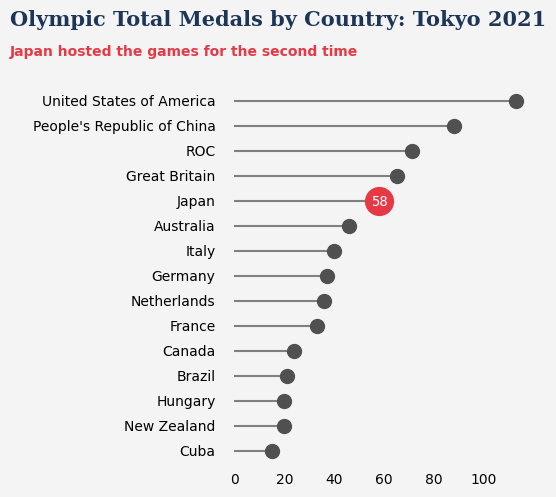

In [3]:
# Customize color palette and background
background_color = '#f4f4f4'  # Soft light green background
highlight_color = '#E63946'  # Soft green for highlighted points
line_color = '#808080'  # Lighter greenish shade for the lines
text_color = '#1D3557'  # Dark blue for text for contrast

fig, ax = plt.subplots(figsize=(4, 5), facecolor=background_color)

# Sorting and selecting the top 15 teams by total medals
temp = df_full[:15].sort_values(by='Total')
my_range = range(1, len(df_full[:15]['Team/NOC']) + 1)

# Setting background color
ax.set_facecolor(background_color)

# Drawing horizontal lines in a lighter greenish color
plt.hlines(y=my_range, xmin=0, xmax=temp['Total'], color=line_color)

# Plotting points with a more neutral green color
plt.plot(temp['Total'], my_range, "o", markersize=10, color='#505050')

# Highlighting the 3rd team with a stronger green color
plt.plot(temp['Total'][2], my_range[10], "o", markersize=20, color=highlight_color)

# Adjusting axis limits
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

# Customizing ticks and labels
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_xlabel("Total Medals", fontfamily='monospace', loc='left', color='gray')
ax.set_axisbelow(True)

# Remove spines
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Adding title and additional annotations
ax.text(-90, Yend + 2.3, 'Olympic Total Medals by Country: Tokyo 2021', 
        fontsize=15, fontweight='bold', fontfamily='serif', color=text_color)

ax.text(-90, Yend + 1.1, 'Japan hosted the games for the second time', 
        fontsize=10, fontweight='bold', fontfamily='sansserif', color=highlight_color)

# Setting y-ticks for team names
plt.yticks(my_range, temp['Team/NOC'])

# Removing extra x-label
ax.set_xlabel('')

# Annotating the specific point
ax.annotate(temp['Total'][2], xy=(54.86, 10.95), va='center', ha='left', 
            fontweight='light', fontfamily='monospace', fontsize=10, 
            color='white', rotation=0)

# Show the plot
plt.show()



<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Medal Distribution Analysis: 🏅
- This graph visually presents the total number of medals won by countries in the 2021 Tokyo Olympics. It is designed as a horizontal bar chart, with countries ranked from the highest to the lowest medal counts.
- The USA is at the top with over 100 medals, followed by China and the Russian Olympic Committee (ROC) in second and third places, respectively.
- The host country Japan secured 58 medals, ranking 5th and achieving a historic performance. This result is considered one of Japan's most successful Olympic performances to date.
- The ranking in the graph reflects each country's strong performance and strategies during the Olympics.
</div>



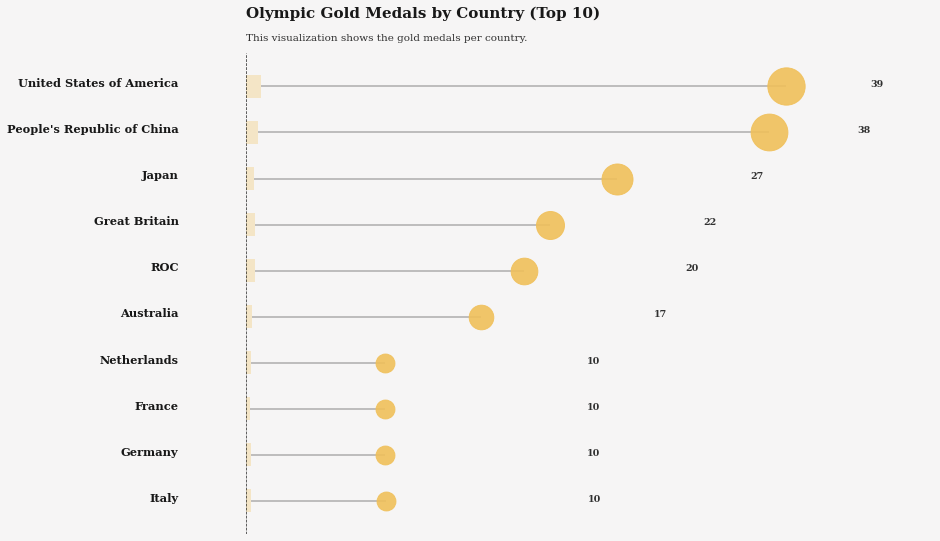

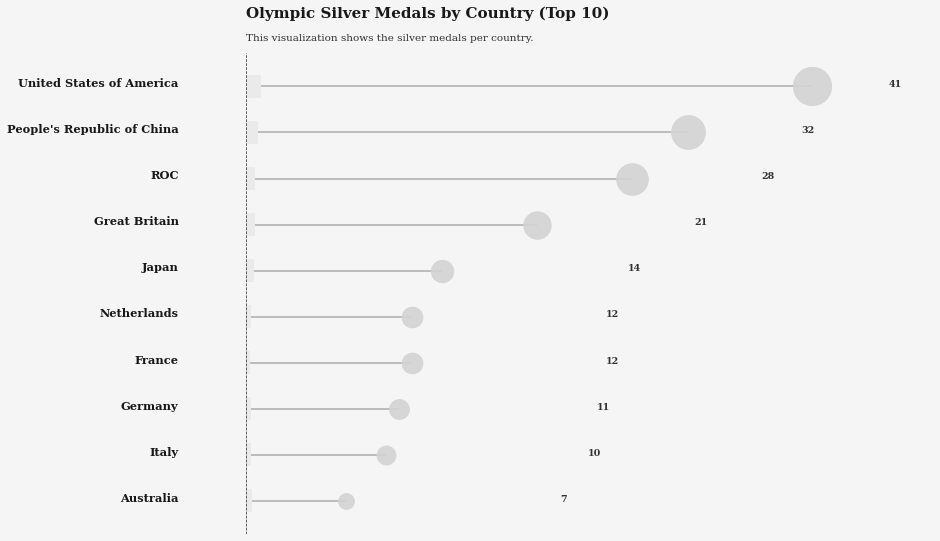

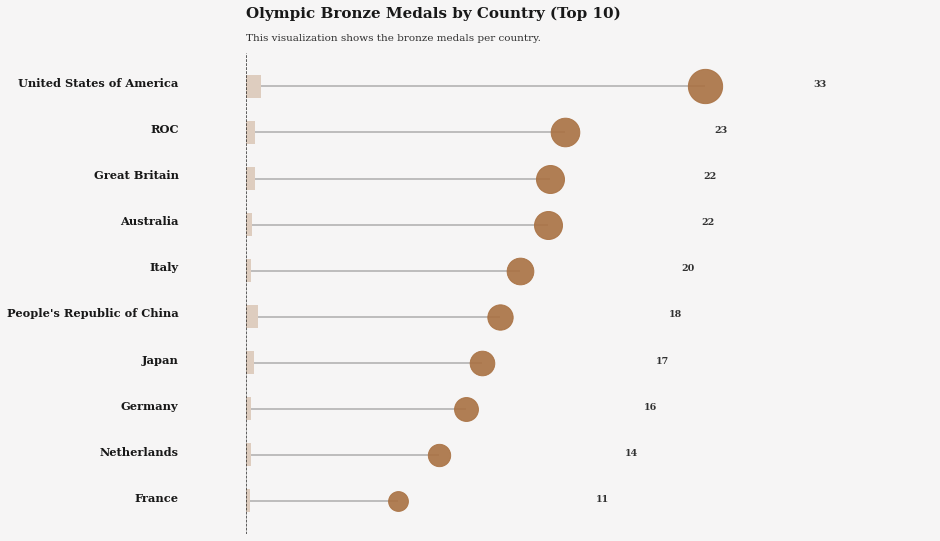

In [4]:
def highlight(nation):
    if nation['Team/NOC'] == 'Japan':
        return ['background-color: #f3f2f1']*6
    else:
        return ['background-color: white']*6

# Get top 15 countries
df_top10 = df_full[['Rank', 'Team/NOC', 'Bronze Medal', 'Silver Medal', 'Gold Medal', 'Total']].iloc[:10]

# Create three separate figures
for medal_type, color in [('Gold Medal', '#f0c05a'), 
                         ('Silver Medal', 'Lightgray'), 
                         ('Bronze Medal', '#a97142')]:
    # Sort the dataframe by the specific medal type in descending order and reverse the index
    df_sorted = df_top10.sort_values(by=medal_type, ascending=False).iloc[::-1]
    
    fig, ax = plt.subplots(figsize=(14, 8), dpi=68)
    # Background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')
    
    # Full-length horizontal bars
    ax.barh(y=df_sorted['Team/NOC'], 
            width=df_sorted['Total'], 
            height=0.5,  # Increased height to make bars more visible 
            color=color,
            alpha=0.3)  # Reduced opacity to make bars subtle
    
    # Scatter points
    for idx, (team, total, specific_medals) in enumerate(zip(df_sorted['Team/NOC'], 
                                                             df_sorted['Total'], 
                                                             df_sorted[medal_type])):
        # Horizontal line to the scatter point
        ax.hlines(y=idx, xmin=total, xmax=total+specific_medals*100, 
                  color='gray', alpha=0.5, linewidth=2)
        
        # Scatter point
        ax.scatter(x=total+specific_medals*100, y=idx, 
                   s=specific_medals*40,  # Reduced size
                   c=color, 
                   alpha=0.9, 
                   zorder=10)
    
    # Centerline
    ax.axvline(x=0, ymin=0, ymax=1, 
               linewidth=0.8, linestyle='--', color='black', alpha=0.8)
    
    # Labels
    for idx, (team, total, specific_medals) in enumerate(zip(df_sorted['Team/NOC'], 
                                                             df_sorted['Total'], 
                                                             df_sorted[medal_type])):
        ax.text(-500, idx, team,
                horizontalalignment='right',
                fontsize=12, fontfamily='serif', fontweight='bold',
                color='black', alpha=0.9)
        
        # Display specific medal count
        ax.text(total+specific_medals*70+1800, idx, f"{specific_medals}",  # +1000 ile daha sağa aldım
            horizontalalignment='left',
            fontsize=10, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.8)
    
    # Remove frame and axes
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    max_total = max(df_sorted['Total'])
    ax.set_xlim([0, max_total + 5000])
    
    # Titles
    ax.text(0, len(df_sorted) + 0.5, f'Olympic {medal_type}s by Country (Top 10)',
            fontsize=16, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.9)
    ax.text(0, len(df_sorted), f'This visualization shows the {medal_type.lower()}s per country.',
            fontsize=11, fontfamily='serif', color='black', alpha=0.8)
    
    plt.tight_layout()
    plt.show()

# Styled DataFrame (keeping the original styling)
styled_df = df_top10.style.set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 10]')\
    .bar(subset=['Gold Medal'], color='#f0c05a')\
    .bar(subset=['Silver Medal'], color='Lightgray')\
    .bar(subset=['Bronze Medal'], color='#a97142')\
    .hide(axis="index")\
    .apply(highlight, axis=1)

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Gold Medal Analysis: 🏅
- This graph shows the top 10 countries with the most gold medals in the Olympic Games. The visual is designed as a horizontal bar chart, with the ranking arranged from the highest to the lowest number of gold medals.
- The USA is at the top with 39 gold medals, followed by China with 38, and the host country Japan with 27 gold medals.
- As the number of gold medals increases, the size of the circles also grows. This visual feature highlights the differences in medal counts effectively, emphasizing the superior Olympic performances of these countries.
</div>

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🥈 Silver Medal Analysis: 🥈
- This graph shows the top 10 countries with the most silver medals in the Olympic Games. The visual is designed as a horizontal bar chart, with countries ranked from the highest to the lowest number of silver medals.
- The USA leads with 41 silver medals, followed by China with 32, and the Russian Olympic Committee (ROC) with 28.
- The size of the circles increases in parallel with the number of silver medals, making the differences in medal counts visually prominent. This feature effectively highlights the disparities in silver medal counts between countries.
</div>

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🥉 Bronze Medal Analysis: 🥉
- This graph shows the top 10 countries with the most bronze medals in the Olympic Games. The visual is designed as a horizontal bar chart, with the ranking arranged from the highest to the lowest number of bronze medals.
- The USA leads with 33 bronze medals, followed by the Russian Olympic Committee (ROC) with 23, and both Great Britain and Australia with 22 bronze medals.
- As the number of bronze medals increases, the size of the circles also grows, making the differences in bronze medal counts more visually prominent and presenting the data in an effective and clear manner.
</div>



In [5]:
# For geographic plotting
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')

#global_polygons.plot(figsize=(10,5)) we now have a map of the globe

# Tabular
df = pd.merge(df,regions,left_on='NOC',right_on='NOC')
df = df.query('Season == "Summer"') # Only interested in Summer Olympics for this project

In [6]:
#Replacing the country name with common values
df.replace('USA', "United States of America", inplace = True)
df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df.replace('Congo', "Republic of the Congo", inplace = True)
df.replace('Lao', "Laos", inplace = True)
df.replace('Syrian Arab Republic', "Syria", inplace = True)
df.replace('Serbia', "Republic of Serbia", inplace = True)
df.replace('Czechia', "Czech Republic", inplace = True)
df.replace('UAE', "United Arab Emirates", inplace = True)
df.replace('UK', "United Kingdom", inplace = True)

population.replace('United States', "United States of America", inplace = True)
population.replace('Czech Republic (Czechia)', "Czech Republic", inplace = True)
population.replace('DR Congo', "Democratic Republic of the Congo", inplace = True)
population.replace('Serbia', "Republic of Serbia", inplace = True)
population.replace('Tanzania', "United Republic of Tanzania", inplace = True)

df_full.replace('Great Britain', "United Kingdom", inplace = True)
df_full.replace("People's Republic of China", "China", inplace = True)
df_full.replace("ROC", "Russia", inplace = True)


In [7]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva":
        return  "Russia"
    elif col == "Montreal":
        return  "Canada"
    elif col == "Munich" or col == "Berlin":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo":
        return  "Japan"
    elif col == "Roma":
        return  "Italy"
    elif col == "Paris":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    else:
        return "Other"


# Applying this function

df['Host_Country'] = df['City'].apply(host_country)

In [8]:
df_new = df.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [9]:
# Preparing to add 2021 data to our historic df

df_21_full_refined = df_full[['Team/NOC', "Gold Medal", "Silver Medal", "Bronze Medal"]]
df_21_full_refined['Total Medals'] = df_21_full_refined[["Gold Medal", "Silver Medal", "Bronze Medal"]].sum(axis=1)
df_21_full_refined['Year'] = 2021

df_21_full_refined = df_21_full_refined.rename(columns={'Gold Medal':'Gold', 'Silver Medal':'Silver','Bronze Medal':'Bronze'})

df_21_full_refined['Is_Host'] = np.where(df_21_full_refined['Team/NOC'] == 'Japan',1,0)
df_21_full_refined['Host_Country'] = 'Japan'
df_21_full_refined = df_21_full_refined.rename(columns={'Team/NOC':'region'})

# Adding 2021 data to historic
df_new = pd.concat([df_new, df_21_full_refined], ignore_index=True)

# Removing Russia as many Olympic games were competed in as the Soviet Union, containing several modern day nations

df_new = df_new.query("region != 'Russia' | region != 'ROC'")

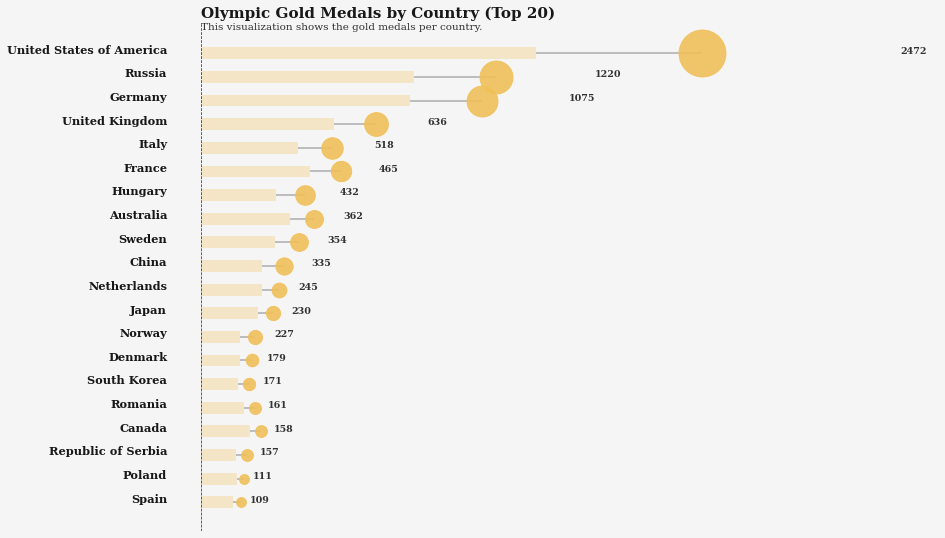

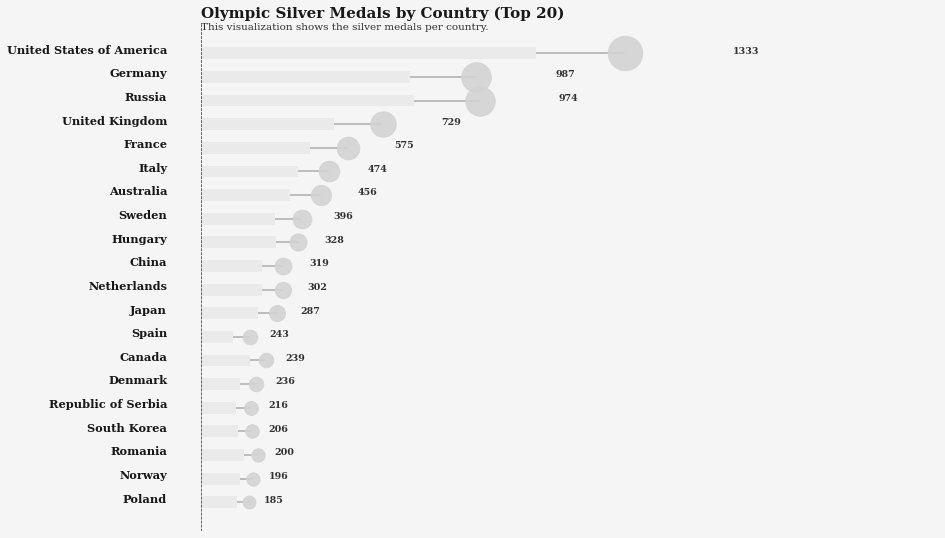

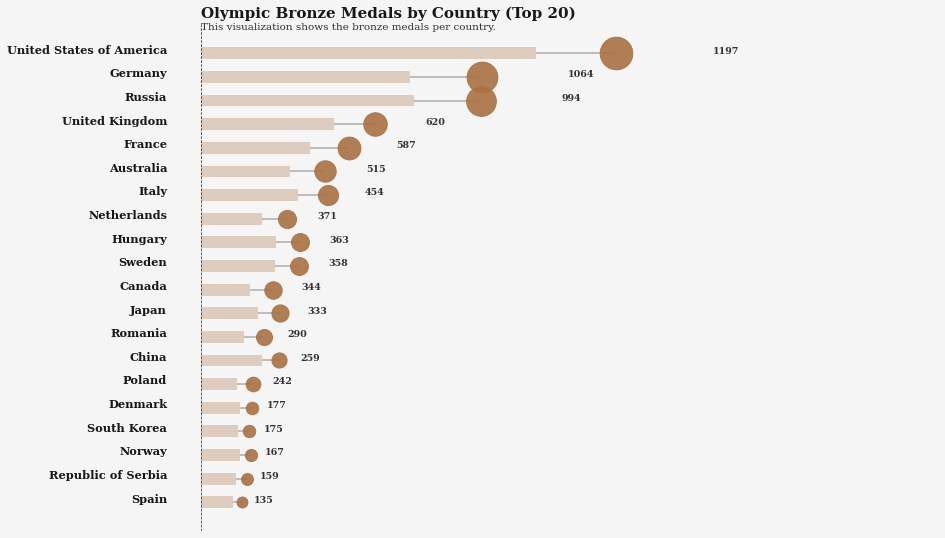

In [10]:
import matplotlib.pyplot as plt

# Assuming medals DataFrame is already created
medals = df.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)
medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']
medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)
medals_top20 = medals.iloc[:20]

# Create three separate figures
for medal_type, color in [('Gold', '#f0c05a'), 
                          ('Silver', 'Lightgray'), 
                          ('Bronze', '#a97142')]:
    # Sort the dataframe by the specific medal type in descending order and reverse the index
    df_sorted = medals_top20.sort_values(by=medal_type, ascending=False).iloc[::-1]
    
    fig, ax = plt.subplots(figsize=(14, 8), dpi=68)
    # Background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')
    
    # Full-length horizontal bars
    ax.barh(y=df_sorted.index, 
            width=df_sorted['Total'], 
            height=0.5,  # Increased height to make bars more visible 
            color=color,
            alpha=0.3)  # Reduced opacity to make bars subtle
    
    # Scatter points and horizontal lines
    for idx, (team, total, specific_medals) in enumerate(zip(df_sorted.index, 
                                                             df_sorted['Total'], 
                                                             df_sorted[medal_type])):
        # Horizontal line to the scatter point
        ax.hlines(y=idx, xmin=total, xmax=total+specific_medals*1, 
                  color='gray', alpha=0.5, linewidth=2)
        
        # Scatter point
        ax.scatter(x=total+specific_medals, y=idx, 
                   s=specific_medals,  # Reduced size
                   c=color, 
                   alpha=0.9, 
                   zorder=10)
    
    # Centerline
    ax.axvline(x=0, ymin=0, ymax=1, 
               linewidth=0.8, linestyle='--', color='black', alpha=0.8)
    
    # Labels
    for idx, (team, total, specific_medals) in enumerate(zip(df_sorted.index, 
                                                             df_sorted['Total'], 
                                                             df_sorted[medal_type])):
        # Country name
        ax.text(-500, idx, team,
                horizontalalignment='right',
                fontsize=12, fontfamily='serif', fontweight='bold',
                color='black', alpha=0.9)
        
        # Medal count
        ax.text(total+specific_medals*2.2+1, idx, f"{specific_medals}",
                horizontalalignment='left',
                fontsize=10, fontfamily='serif', fontweight='bold',
                color='black', alpha=0.8)
    
    # Remove frame and axes
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    max_total = max(df_sorted['Total'])
    ax.set_xlim([0, max_total + 6000])
    
    # Titles
    ax.text(0, len(df_sorted) + 0.5, f'Olympic {medal_type} Medals by Country (Top 20)',
            fontsize=16, fontfamily='serif', fontweight='bold',
            color='black', alpha=0.9)
    ax.text(0, len(df_sorted), f'This visualization shows the {medal_type.lower()} medals per country.',
            fontsize=11, fontfamily='serif', color='black', alpha=0.8)
    
    plt.tight_layout()
    plt.show()

# Styled DataFrame
styled_df = medals_top20.style.set_caption('Medals by Country: Summer Olympic Games [Top 20]')\
    .bar(subset=['Gold'], color='#f0c05a')\
    .bar(subset=['Silver'], color='Lightgray')\
    .bar(subset=['Bronze'], color='#a97142')

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Gold Medal Analysis: 🏅
- This graph shows the top 20 countries with the most gold medals in the history of the Olympic Games. The visual is designed as a horizontal bar chart, with the ranking arranged from the highest to the lowest number of gold medals.
- The USA leads with 2,472 gold medals, followed by Russia with 1,220 and Germany with 1,075.
- As the number of gold medals increases, the size of the circles in the graph grows. This visual feature effectively highlights the differences in medal counts, making the data more compelling.
- This graph provides a clear and straightforward way to compare the Olympic gold medal performances of countries over time. It also shows how some countries are far more successful than others in this area.
</div>

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🥈 Silver Medal Analysis: 🥈
- This graph shows the top 20 countries with the most silver medals in the history of the Olympic Games. The visual is designed as a horizontal bar chart, with the ranking arranged from the highest to the lowest number of silver medals.
- The USA leads with 1,333 silver medals, followed by Germany with 987 and Russia with 974.
- As the number of silver medals increases, the size of the circles in the graph grows. This feature serves as an effective way to visually emphasize the differences in medal counts.
- This graph provides a clear and understandable method for comparing the Olympic silver medal performances of countries. It also highlights some countries' superior success in this category.
</div>

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🥉 Bronze Medal Analysis: 🥉
- This graph shows the top 20 countries with the most silver medals in the history of the Olympic Games. The visual is designed as a horizontal bar chart, with the ranking arranged from the highest to the lowest number of silver medals.
- The USA leads with 1,333 silver medals, followed by Germany with 987 and Russia with 974.
- As the number of silver medals increases, the size of the circles in the graph grows. This feature serves as an effective way to visually emphasize the differences in medal counts.
- This graph provides a clear and understandable method for comparing the Olympic silver medal performances of countries. It also highlights some countries' superior success in this category.
</div>


In [11]:
host_list = list(df_new.query("Is_Host == 1")['Host_Country'].value_counts().index)

medals_temp = medals.reset_index()
medals_map = pd.merge(global_polygons, medals_temp, left_on='name',right_on='region')
medals_map['Hosted'] = np.where(medals_map['name'].isin(host_list),1,0)

In [12]:
def rd2(x):
    return round(x, 2)

Temp = medals_map

minimum, maximum = Temp["Total"].quantile([0.05, 0.95]).apply(rd2)
mean = round(Temp["Total"].mean(), 2)


colormap = branca.colormap.LinearColormap(
    colors=["#e6f3ff", '#b3d9ff', "#80bfff", "#4d94ff", "#1a66ff"],
    index=Temp["Total"].quantile([0.25, 0.5, 0.85, 0.95]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = "Total medals"

from folium.plugins import Search
from folium.plugins import HeatMap


m = folium.Map(location=(50,0),zoom_start=3)


def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["Total"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


Map_Layer = folium.GeoJson(
    Temp,
    name="Medals",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Total","Gold","Silver","Bronze"], aliases=["Country","Total Medals","Gold","Silver","Bronze"], localize=True
    ),
).add_to(m)


plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='region',
                           geom_type='Polygon').add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
    
folium.LayerControl().add_to(m)
colormap.add_to(m)

m

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- This graph is a world map showing the total medal counts of countries in the Olympic Games. The map highlights countries with darker colors as their medal count increases, visually emphasizing the top-performing nations.
- Some countries in Europe and North America, especially the USA, stand out as top medal winners. These countries are notable for their strong performances in the Olympics.
- Countries in Africa and Asia appear to have won fewer medals, highlighting regional differences in Olympic success.
- In the top-right corner of the graph, there's a list of the top 10 medal-winning countries. This list complements the visual information on the map and provides a more detailed view of each country's Olympic performance.
- Overall, this graph offers an effective way to visualize the geographic distribution of Olympic medals. However, the small size of the map and the difficulty in reading some country names may limit the clarity of the data.
</div>


In [13]:
Temp = medals_map

colormap = branca.colormap.LinearColormap(
    colors=["#e6f3ff",  "#1a66ff"],
    index=Temp["Hosted"].quantile([0.05, 0.5]),
    vmin=0,
    vmax=1,
)

colormap.caption = "Hosted"

from folium.plugins import Search
from folium.plugins import HeatMap


m = folium.Map(location=(50,0),zoom_start=3)


def style_function(x):
    return {
        "fillColor": colormap(x["properties"]["Hosted"]),
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.5,
    }


Map_Layer = folium.GeoJson(
    Temp,
    name="Hosted",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=["name","Total","Gold","Silver","Bronze"], aliases=["Country","Total Medals","Gold","Silver","Bronze"], localize=True
    ),
).add_to(m)


plugins.Search(Map_Layer,position='topleft',
                           search_zoom=5,placeholder="Search for a country",weight=3,
                           search_label='region',
                           geom_type='Polygon').add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
    
folium.LayerControl().add_to(m)
colormap.add_to(m)

m

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- The world map shows Olympic medal statistics for various countries, with Russia standing out as a top performer with 3,188 total medals (1,220 gold, 974 silver, 994 bronze). The map highlights the global spread of Olympic achievements, with European countries appearing to have a strong representation in medal counts.
</div>


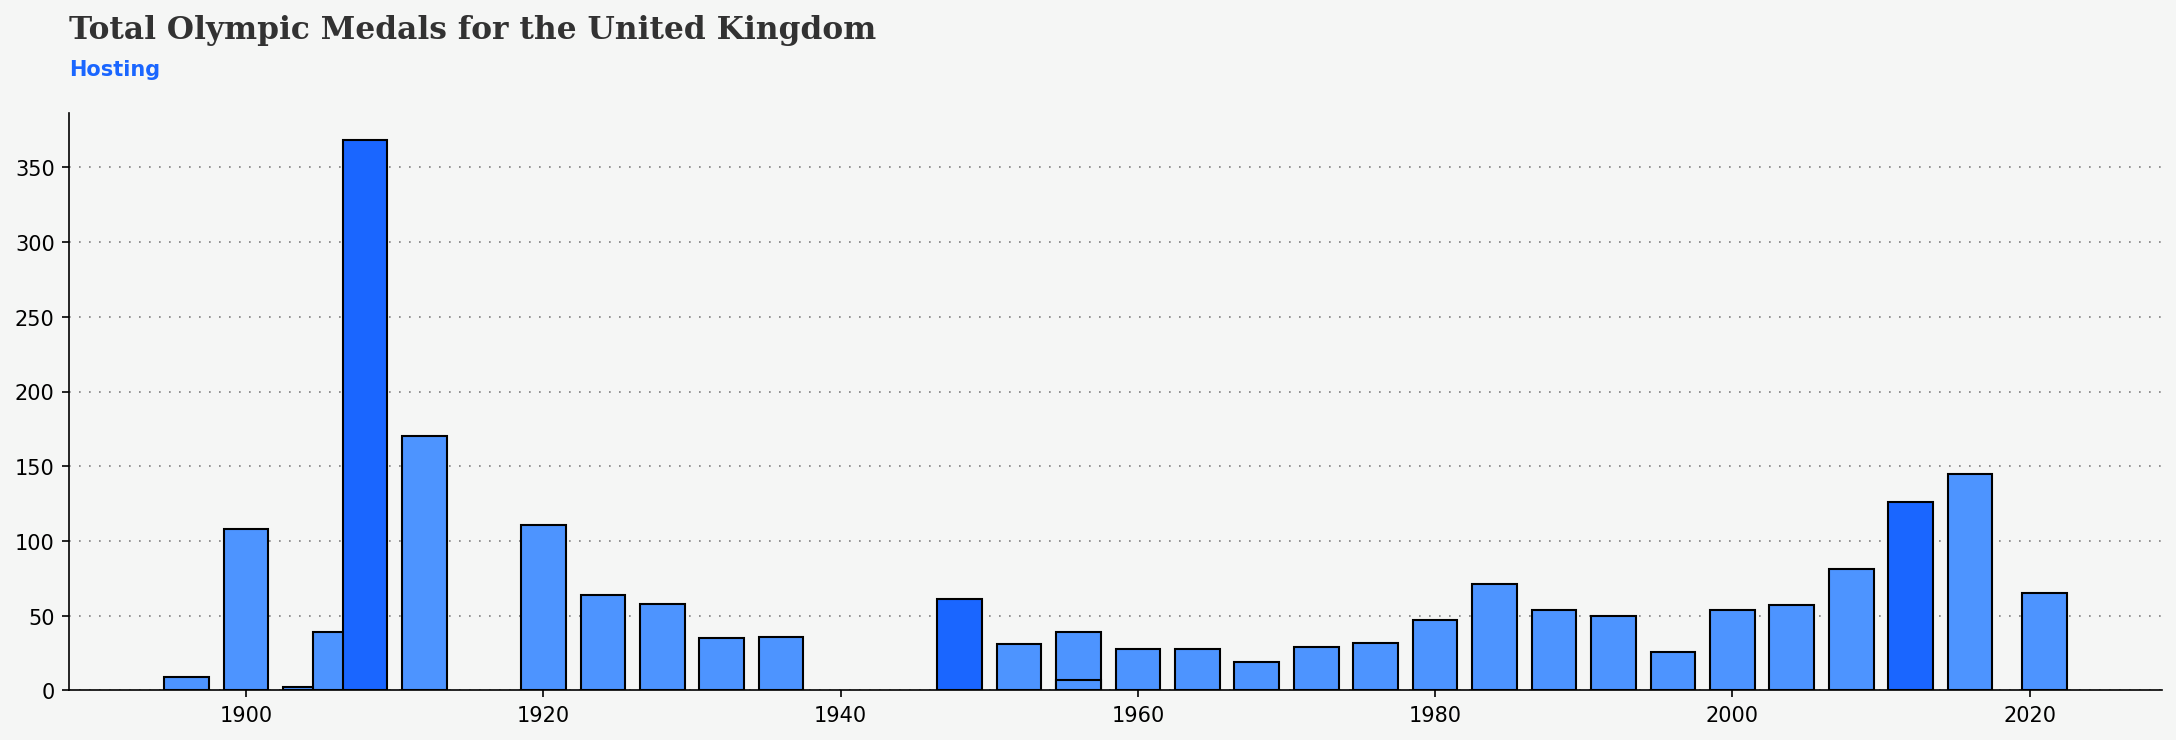

In [14]:
temp = df_new.query("region == 'United Kingdom'")

# Set background color (using a light grayish-blue)
background_color = '#F5F6F5'

fig, ax = plt.subplots(1, 1, figsize=(18, 5), dpi=150, facecolor=background_color)

# Blue tones: Dark blue for host (#1A66FF), lighter blue for non-host (#4D94FF)
color = ['#1A66FF' if i == 1 else '#4D94FF' for i in temp['Is_Host']]

# Create bar plot with blue tones
ax.bar(temp['Year'], temp['Total Medals'], width=3, color=color, ec='black')
ax.set_facecolor(background_color)
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

# Remove top and right spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Get axis limits
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

# Add titles with adjusted colors
ax.text(Xstart, Yend+50, 'Total Olympic Medals for the United Kingdom', 
        fontsize=15, fontweight='bold', fontfamily='serif', color='#323232')
ax.text(Xstart, Yend+25, 'Hosting', 
        fontsize=10, fontweight='bold', fontfamily='sans-serif', color='#1A66FF')  # Matching host bar color

plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- This graph demonstrates the United Kingdom's Olympic performance over time. There's a notable peak in the early 1900s, with a significant spike around 1908. The country's medal count shows considerable variability, with recent decades showing a resurgence in Olympic success, particularly in the 2000s and 2010s.
</div>


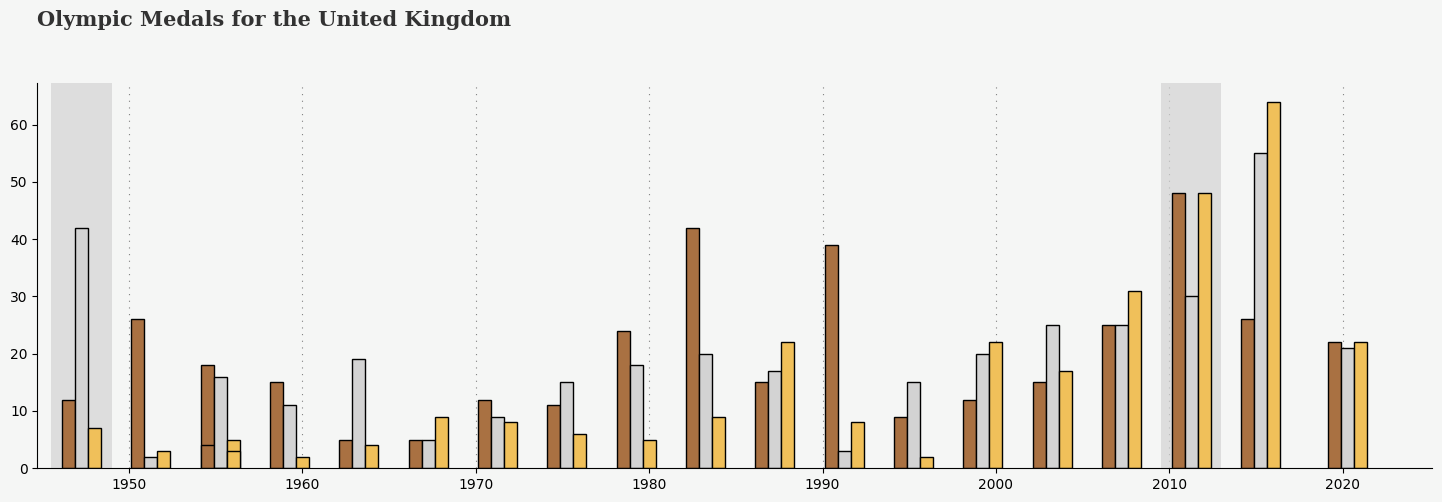

In [15]:
temp = df_new.query("region == 'United Kingdom' & Year > 1945")

fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']


# Host years
ax.axvspan(1949,1945.5, facecolor='lightgray',alpha=0.7)
ax.axvspan(2013,2009.5, facecolor='lightgray',alpha=0.7)

medals_list = ['Bronze', 'Silver', 'Gold']
width = 0.75
for i, medal in enumerate(np.array(medals_list)):
    ax.bar(temp['Year']+(width*(i-2)), temp[medal], width, color=color[i], label=medal, ec='black')
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3,Yend+10, 'Olympic Medals for the United Kingdom', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

ax.set_xlim(Xstart+3, Xend)

ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))

ax.set_axisbelow(True)

plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- This more detailed view breaks down the UK's Olympic medals by type (gold, silver, bronze). The graph reveals interesting patterns of performance, with hosting years (shown in gray) often coinciding with increased medal counts. The most recent Olympics show a strong performance, with a notable increase in gold medals.
</div>


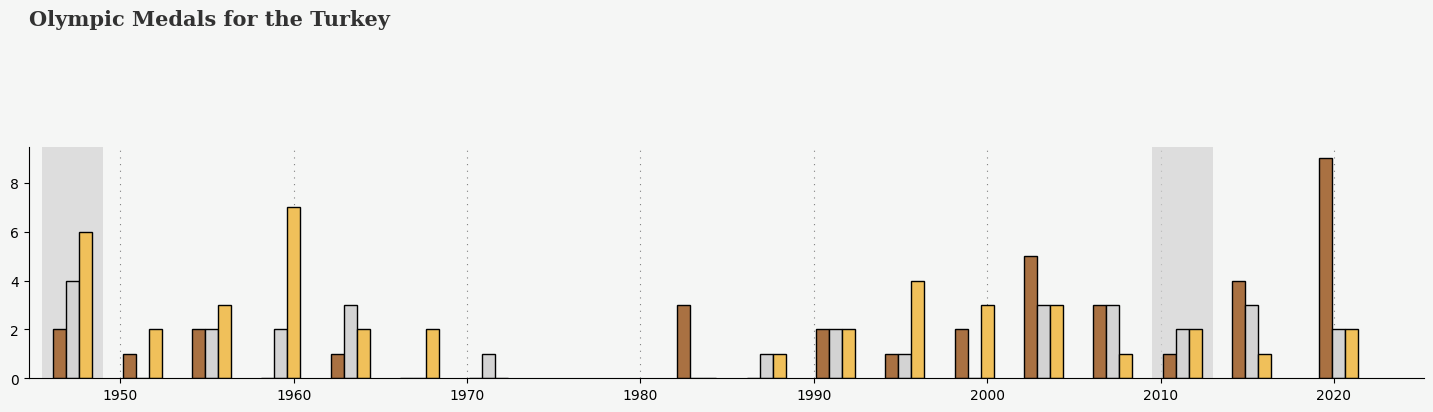

In [16]:
temp = df_new.query("region == 'Turkey' & Year > 1945")

fig, ax = plt.subplots(1, 1, figsize=(18, 3), facecolor=background_color)

ax.set_facecolor(background_color)

color = ["#a97142", "lightgray", '#f0c05a']


# Host years
ax.axvspan(1949,1945.5, facecolor='lightgray',alpha=0.7)
ax.axvspan(2013,2009.5, facecolor='lightgray',alpha=0.7)

medals_list = ['Bronze', 'Silver', 'Gold']
width = 0.75
for i, medal in enumerate(np.array(medals_list)):
    ax.bar(temp['Year']+(width*(i-2)), temp[medal], width, color=color[i], label=medal, ec='black')
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3,Yend+5, 'Olympic Medals for the Turkey', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')


ax.set_xlim(Xstart+3, Xend)

ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))

ax.set_axisbelow(True)

plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- Turkey's Olympic performance appears more modest compared to some larger nations. The graph shows gradual improvement over time, with some notable peaks. The hosting years (in gray) seem to correlate with slight increases in medal counts, suggesting a home advantage effect.
</div>


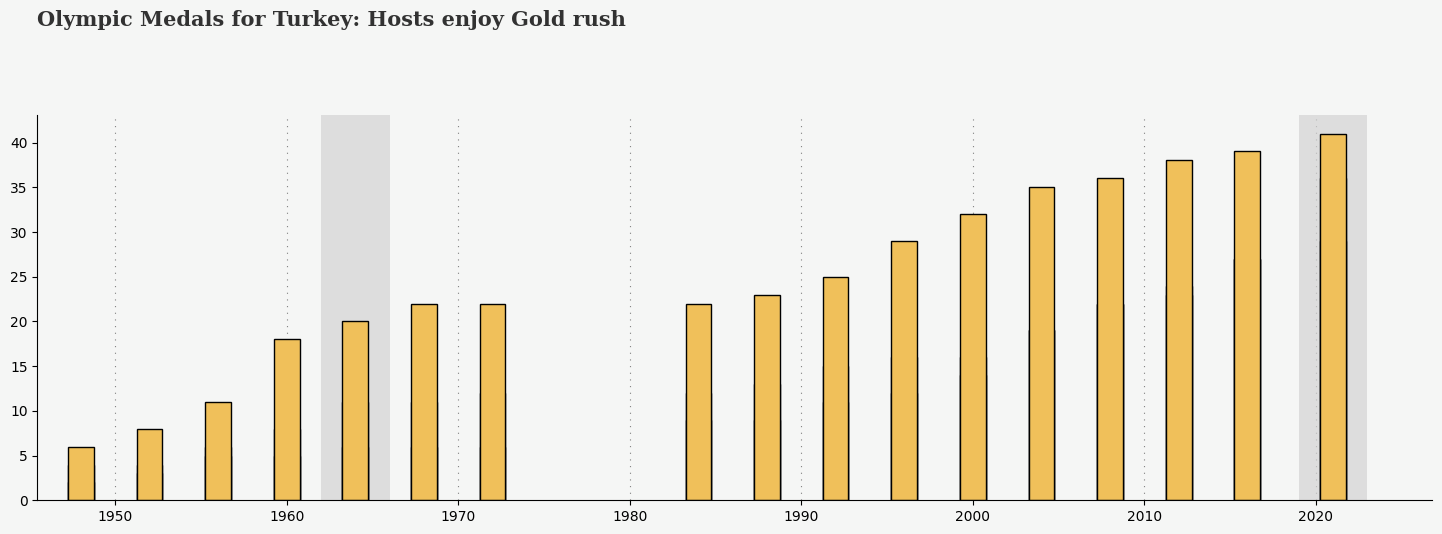

In [17]:
background_color = '#F5F6F5'  # You can replace this with your original background_color

fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor=background_color)
ax.set_facecolor(background_color)

# Original colors preserved
color = ["#a97142", "lightgray", '#f0c05a']  # Bronze, Silver, Gold

# Host years with original lightgray
ax.axvspan(2023, 2019, facecolor='lightgray', alpha=0.7)
ax.axvspan(1966, 1962, facecolor='lightgray', alpha=0.7)

# Define medals list
medals_list = ['Bronze', 'Silver', 'Gold']

# Calculate cumulative sum for each medal type, fixing the ValueError
temp = df_new.query("region == 'Turkey' & Year > 1945")\
    .groupby(['Year'])[['Gold', 'Silver', 'Bronze']].sum()  # Use list for column selection
for i, medal in enumerate(medals_list):
    cumulative = temp[medal].cumsum()  # Calculate cumulative sum for each medal
    ax.bar(cumulative.index, cumulative, color=color[i], width=1.5, ec='black')

# Get axis limits
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

# Original titles preserved
ax.text(Xstart + 2, Yend + 10, 'Olympic Medals for Turkey: Hosts enjoy Gold rush', 
        fontsize=15, fontweight='bold', fontfamily='serif', color='#323232')

# Set x-axis limits and grid
ax.set_xlim(Xstart + 2, Xend)
ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

# Remove top and right spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- This visualization focuses on Turkey's gold medals, highlighting a steady improvement over time. The title "Hosts enjoy Gold Rush" suggests that hosting Olympics has a positive impact on the country's performance. There's a clear upward trend in gold medal acquisitions, especially in recent decades.
</div>


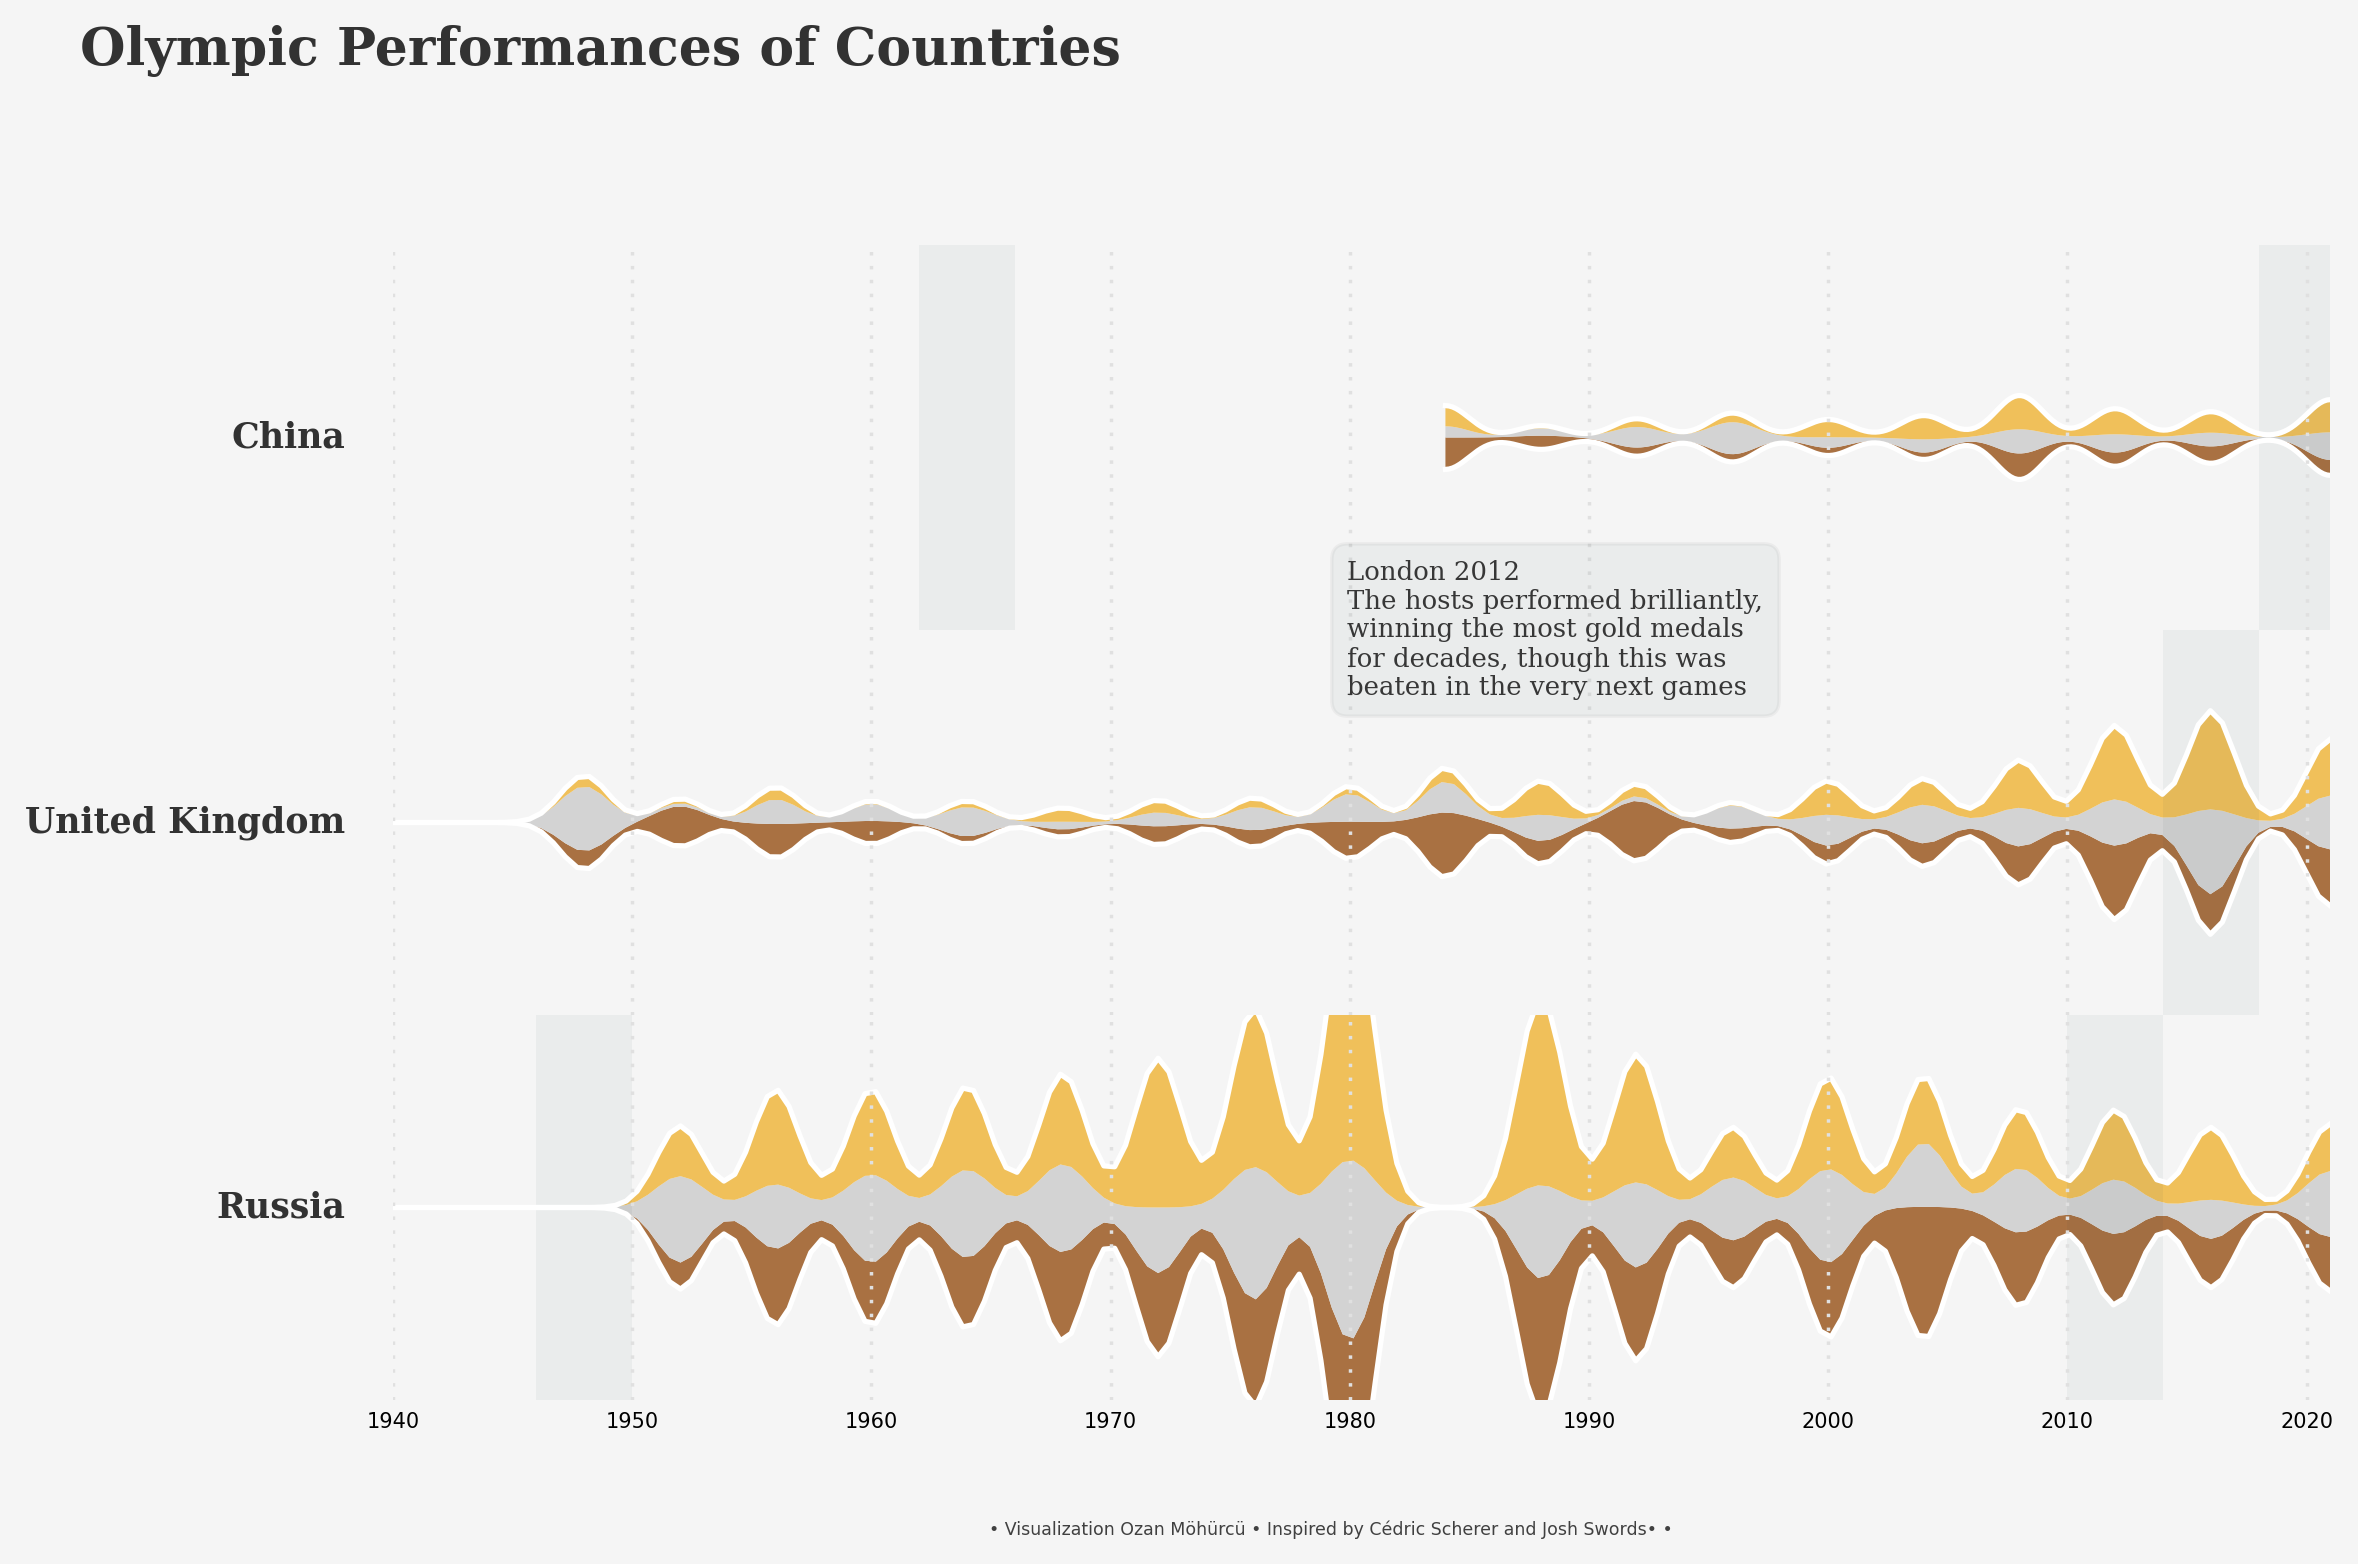

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.colors as mc
import colorsys

def adjust_lightness(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

# Function for smoothing
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

# Background color
background_color = '#f5f5f5'

# Prepare the figure
fig, ax = plt.subplots(3, 1, figsize=(10, 6), dpi=250, facecolor=background_color)

# Colors for medal types
colors = ['#a97142', 'lightgray', '#f0c05a']

# X-axis ticks
x_ticks = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Countries to visualize
countries = ['China','United Kingdom','Russia']

for axes, country in enumerate(countries):
    # Define & transform data
    stream = df_new.query(f"region == '{country}'")[['Year', 'Gold', 'Silver', 'Bronze']]
    y = [stream['Bronze'].values, stream['Silver'].values, stream['Gold'].values]
    x = np.array(stream['Year'])
    grid = np.linspace(x.min(), x.max(), num=250)
    y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
    
    # Build plot
    ax[axes].stackplot(grid, y_smoothed, baseline="sym", colors=colors)
    line = np.array(y_smoothed).sum(0)
    ax[axes].plot(grid, line / 2, lw=1.5, color="white")
    ax[axes].plot(grid, -line / 2, lw=1.5, color="white")
    
    # Label country
    ax[axes].text(1938, 0, f'{country}', ha='right', va='center', 
                  fontfamily='serif', fontweight='bold', color='#323232')
    
    # Axes tweaks & visual changes
    ax[axes].set_ylim(-25, 25)
    ax[axes].set_xlim(1940, 2021)
    ax[axes].set_facecolor(background_color)
    ax[axes].spines[:].set_visible(False)
    ax[axes].yaxis.set_visible(False)
    ax[axes].tick_params(axis='both', which='both', length=0)
    
    # Vertical grid lines
    for x_tick in x_ticks:
        ax[axes].axvline(x_tick, color='#e0e0e0', ls=(0, (1, 3)), lw=1, zorder=10)

# Hide x-axis for first two subplots
for axes in range(0, 2):
    ax[axes].xaxis.set_visible(False)

# Configure x-axis for the last subplot
ax[2].tick_params(axis='x', labelsize=6, color='#4d4d4d')
ax[2].set_xticks(x_ticks)

# Highlight Olympic hosting periods
ax[0].axvspan(2018, 2022, facecolor='#244747', alpha=0.05)
ax[0].axvspan(1962, 1966, facecolor='#244747', alpha=0.05)
ax[1].axvspan(2014, 2018, facecolor='#244747', alpha=0.05)
ax[2].axvspan(2010, 2014, facecolor='#244747', alpha=0.05)
ax[2].axvspan(1946, 1950, facecolor='#244747', alpha=0.05)

# Title of the visualization
fig.text(0, 1, "Olympic Performances of Countries", 
         fontsize=15, fontweight='bold', fontfamily='serif', color='#323232')

# Annotation text
TEXTS = [
    {
        "text": 'London 2012\nThe hosts performed brilliantly,\nwinning the most gold medals\nfor decades, though this was \nbeaten in the very next games',
        "ax": 2,
        "x": 0.6,
        "y": 2,
        "color": adjust_lightness("#323232", 1.1)
    }
]

# Add annotation texts
for text_box in TEXTS:
    ax[text_box["ax"]].text(
        x=text_box["x"],
        y=text_box["y"],
        s=text_box["text"], 
        ha="center",
        va="center",
        ma="left",
        fontsize=7.5,
        fontfamily='serif',
        color=text_box["color"],
        bbox=dict(
            boxstyle="round", 
            facecolor='#244747', 
            alpha=0.05,
            edgecolor=text_box["color"],
            pad=0.6
        ),
        transform=ax[text_box["ax"]].transAxes,
        zorder=999
    )

# Footer
fig.text(0.5, 0.02, "• Visualization Ozan Möhürcü • Inspired by Cédric Scherer and Josh Swords• •", 
         color='#404040', fontsize=5, ha="center")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0, hspace=0)

# Show the plot
plt.show()

<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🏅 Analysis Comment 🏅
- This comparative visualization shows the Olympic performances of China, the United Kingdom, and Russia over time. The stacked, smoothed area chart reveals each country's medal distribution (likely gold, silver, and bronze). The annotation about London 2012 highlights the UK's exceptional performance as hosts, winning the most gold medals in decades - a feat quickly challenged in the subsequent games.
</div>


<div class="alert alert-info alert-warning" style="background-color: white; color: black;">
        
### 🎉 Thank you to everyone who reviewed this far! 🎉
- 🙏 Thank you so much for your support and interest! 🙏 I am grateful to each and every one of you for taking your valuable time to review this project. I hope the information I provided was useful and everything about the project was as you expected. 🚀

- 💡 If you have any questions or feedback, please feel free to let me know. 💡
- 
- 🔗 See you in the next project! 🔗</p>
</div>